# Conformalized predictive simulations for univariate time series

<span>
<a target="_blank" href="https://colab.research.google.com/github/Techtonique/ahead_python/blob/main/ahead/demo/thierrymoudiki_20240408_conformal_bench.ipynb">
  <img style="width: inherit;" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</span>


In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R

utils::install.packages(c('forecast', 'fpp', 'fpp2', 'remotes'))
remotes::install_github("Techtonique/ahead")
remotes::install_github("thierrymoudiki/simulatetimeseries")



  Use `force = TRUE` to force installation

  Use `force = TRUE` to force installation

  Use `force = TRUE` to force installation

(as ‘lib’ is unspecified)







	‘/tmp/RtmpbNBzOq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpbNBzOq/downloaded_packages’

(as ‘lib’ is unspecified)



  |======================================================================| 100%


            lower upper length
thetaf_0    86.38 91.29   4.91
dynrmf_0    85.50 89.90   4.40
thetaf_kde  85.68 90.77   5.09
dynrmf_kde  92.23 95.32   3.09
thetaf_boot 79.33 85.64   6.31
dynrmf_boot 87.68 92.05   4.37
thetaf_surr 82.18 87.60   5.42
dynrmf_surr 89.76 93.36   3.60


(as ‘lib’ is unspecified)







	‘/tmp/RtmpbNBzOq/downloaded_packages’

Attaching package: ‘dplyr’



    select



    filter, lag



    intersect, setdiff, setequal, union




`summarise()` has grouped output by 'fcast_method'. You can override using the
`.groups` argument.
# A tibble: 6 × 5
# Groups:   fcast_method [2]
  fcast_method conformal_method  mean lower upper
  <chr>        <chr>            <dbl> <dbl> <dbl>
1 dynrmf       splitconformal    81.4  81.1  81.7
2 thetaf       splitconformal    79.8  79.5  80.2
3 dynrmf       FACI              77.9  77.8  78.0
4 thetaf       FACI              77.6  77.5  77.8
5 dynrmf       AgACI             77.6  77.5  77.8
6 thetaf       AgACI             77.4  77.3  77.6
`summarise()` has grouped output by 'fcast_method'. You can override using the
`.groups` argument.
# A tibble: 6 × 5
# Groups:   fcast_method [2]
  fcast_method conformal_method  mean lower upper
  <chr>        <chr>            <dbl> <dbl> <dbl>
1 dynrmf       splitconformal    95.6  95.4  95.7
2 thetaf       splitconformal    94.4  94.2  94.6
3 dynrmf       FACI              91.0  90.9  91.1
4 thetaf       FACI              90.7  90.6  90.8
5 dynrmf

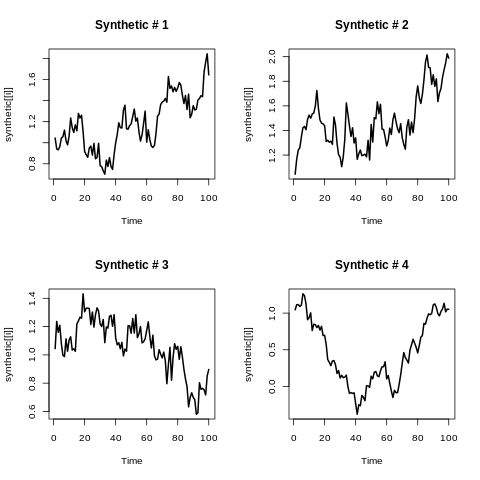

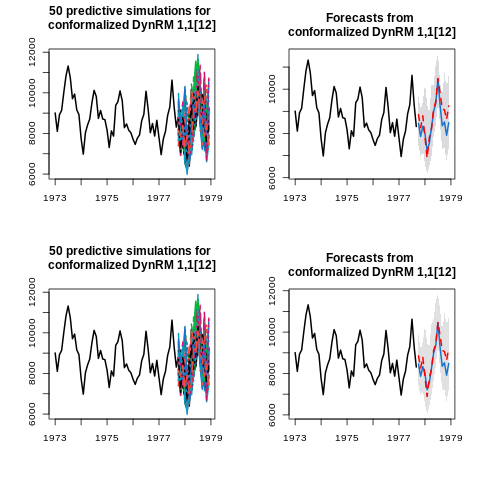

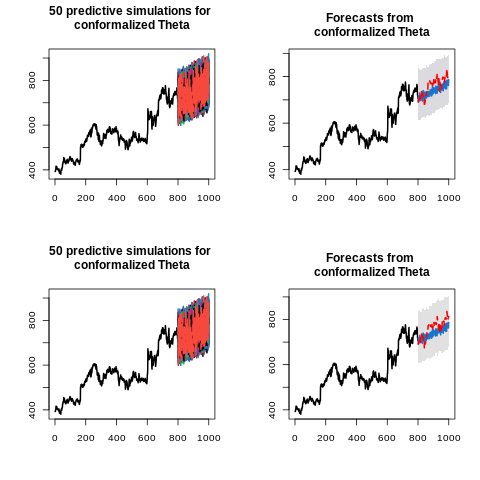

In [5]:
%%R

## ----"1-foursynthplot", echo=FALSE, cache=TRUE, message=FALSE, warning=FALSE, fig.cap="4 synthetic data sets (among 47)"----
suppressWarnings(library(datasets))
suppressWarnings(library(forecast))
suppressWarnings(library(fpp2))
suppressWarnings(library(ahead))
suppressWarnings(library(simulatetimeseries))

n_synthetic <- 4
synthetic <- vector("list", n_synthetic)
for (j in 1:n_synthetic)
{
 set.seed(123+j*100)
  xi <- rnorm(100, mean = 0, sd = sqrt(0.01))
  eps <- rep(0, 100)
  for (i in 2:100) {
    eps[i] <- 0.99 * eps[i - 1] + xi[i]
  }
  trend <- seq_along(100)
  season_term <- 2 * pi * trend / 180
  synthetic[[j]] <- ts(cos(season_term) + sin(season_term) + 0.01 * trend + eps)
}

par(mfrow=c(2, 2))
for (i in 1:4)
  plot(synthetic[[i]], lwd=2, main=paste("Synthetic #", i))


## ----"2-USAccDeathsfitforecast", echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE------------------------------
library(datasets)
B <- 50L
fit_obj_95_1 <- ahead::fitforecast(USAccDeaths, conformalize = TRUE, pct_train = 0.8, pct_calibration=0.5, method = "dynrmf", type_sim = "kde", vol="constant", B=B, level=95L)
fit_obj_99_1 <- ahead::fitforecast(USAccDeaths, conformalize = TRUE, pct_train = 0.8, pct_calibration=0.5, method = "dynrmf", type_sim = "kde", vol="constant", B=B, level=99L)


## ----"3-USAccDeathssimsplots", echo=FALSE, cache=FALSE, fig.alt='USAccDeaths', fig.cap="50 predictive simulations for USAccDeaths (95% coverage and 99% coverage)"----
par(mfrow=c(2, 2))
fit_obj_95_1$plot(type="simulations")
fit_obj_95_1$plot(type="forecast")
fit_obj_99_1$plot(type="simulations")
fit_obj_99_1$plot(type="forecast")


## ----"4-googfitforecast", echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE-------------------------------------
library(datasets)
B <- 50L
fit_obj_95_2 <- ahead::fitforecast(fpp2::goog, conformalize = 1, pct_train = 0.8, pct_calibration=0.5, method = "thetaf", type_sim = "kde", vol="constant", B=B, level=95L)
fit_obj_99_2 <- ahead::fitforecast(fpp2::goog, conformalize = 1, pct_train = 0.8, pct_calibration=0.5, method = "thetaf", type_sim = "kde", vol="constant", B=B, level=99L)


## ----"5-googsimsplots", echo=FALSE, cache=FALSE, fig.alt='GOOG', fig.cap="50 predictive simulations for GOOG stock (95% and 99% coverage)"----
par(mfrow=c(2, 2))
fit_obj_95_2$plot(type="simulations")
fit_obj_95_2$plot(type="forecast")
fit_obj_99_2$plot(type="simulations")
fit_obj_99_2$plot(type="forecast")


## ----"6-twofiftydatasets", echo=FALSE, cache=TRUE, message=FALSE, warning=FALSE-------------------------------------

utils::install.packages(c("astsa",
 "datasets",
 "expsmooth",
 "fma",
 "forecast",
 "fpp",
 "fpp2",
 "MASS",
 "remotes",
 "reshape2",
 "tswge"), repos="https://cran.r-project.org", quiet=TRUE)
remotes::install_github("thierrymoudiki/simulatetimeseries")
remotes::install_github("thierrymoudiki/AdaptiveConformal")
remotes::install_github("Techtonique/ahead")

install.packages("foreach", repos="https://cran.r-project.org")
install.packages("forecast", repos="https://cran.r-project.org")


suppressWarnings(library(datasets))
suppressWarnings(library(forecast))
suppressWarnings(library(fpp2))
suppressWarnings(library(ahead))
suppressWarnings(library(simulatetimeseries))

all_datasets <- simulatetimeseries::get_data_1()

row_names <- names(all_datasets)

col_names <- c("thetaf_0", "dynrmf_0",
               "thetaf_kde", "dynrmf_kde",
               "thetaf_boot", "dynrmf_boot",
               "thetaf_surr", "dynrmf_surr")

n_datasets <- length(all_datasets)
n_methods <- length(col_names)
results_winkler_score <- results_coverage_rate <- matrix(0, nrow=n_datasets, ncol=n_methods)

rownames(results_winkler_score) <- row_names
colnames(results_winkler_score) <- col_names
rownames(results_coverage_rate) <- row_names
colnames(results_coverage_rate) <- col_names

results_winkler_score <- as.data.frame(results_winkler_score)
results_coverage_rate <- as.data.frame(results_coverage_rate)

params <- vector("list", n_methods)
names(params) <- col_names

level <- 95
pct_train <- 0.9
pct_calibration <- 0.5

types_sim <- c("kde", "boot", "surr")

library("foreach")

pb <- txtProgressBar(min = 0,
                      max = n_datasets,
                      style = 3)
progress <- function(n)
  utils::setTxtProgressBar(pb, n)
opts <- list(progress = progress)

idx_dataset <- NULL
res <- foreach::foreach(
  idx_dataset = 1:n_datasets,
  .packages = c("ahead", "forecast"),
  .errorhandling = "stop",
  .options.snow = opts,
  .verbose = FALSE
) %do% {

  selected_data <- all_datasets[[idx_dataset]]
  # no conformalization
  fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 0, pct_train = pct_train,
                          pct_calibration=pct_calibration,
                          method = "dynrmf"), silent = TRUE)
  if (!inherits(fit_obj, "try-error"))
  {
  results_winkler_score[, "dynrmf_0"][idx_dataset] <- fit_obj$winkler_score
  results_coverage_rate[, "dynrmf_0"][idx_dataset] <- fit_obj$coverage
  } else {
    results_winkler_score[, "dynrmf_0"][idx_dataset] <- NA
    results_coverage_rate[, "dynrmf_0"][idx_dataset] <- NA
  }

  fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 0, pct_train = pct_train,
                          pct_calibration=pct_calibration,
                          method = "thetaf"), silent = TRUE)
  if (!inherits(fit_obj, "try-error"))
  {
  results_winkler_score[, "thetaf_0"][idx_dataset] <- fit_obj$winkler_score
  results_coverage_rate[, "thetaf_0"][idx_dataset] <- fit_obj$coverage
  } else {
    results_winkler_score[, "thetaf_0"][idx_dataset] <- NA
    results_coverage_rate[, "thetaf_0"][idx_dataset] <- NA
  }

  # conformalization
  for (type_sim in types_sim){
    fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 1,
                            pct_train = pct_train,
                            pct_calibration=pct_calibration,
                            method = "dynrmf", type_sim = type_sim), silent = TRUE)
    if (!inherits(fit_obj, "try-error"))
  {
    results_winkler_score[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- fit_obj$winkler_score
    results_coverage_rate[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- fit_obj$coverage #abs(fit_obj$coverage/level - 1)*100
    } else {
      results_winkler_score[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- NA
      results_coverage_rate[, paste0('dynrmf', '_', type_sim)][idx_dataset] <- NA
    }

    fit_obj <- try(ahead::fitforecast(selected_data, conformalize = 1,
                            pct_train = pct_train,
                            pct_calibration=pct_calibration,
                            method = "thetaf", type_sim = type_sim), silent = TRUE)
    if (!inherits(fit_obj, "try-error"))
  {
    results_winkler_score[, paste0('thetaf', '_', type_sim)][idx_dataset] <- fit_obj$winkler_score
    results_coverage_rate[, paste0('thetaf', '_', type_sim)][idx_dataset] <- fit_obj$coverage #abs(fit_obj$coverage/level - 1)*100
    } else {
    results_winkler_score[, paste0('thetaf', '_', type_sim)][idx_dataset] <- NA
    results_coverage_rate[, paste0('thetaf', '_', type_sim)][idx_dataset] <- NA
  }

    }
}

saveRDS(object = results_winkler_score, file = "results_winkler_score.rds")
saveRDS(object = results_coverage_rate, file = "results_coverage_rate.rds")


## ----echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE----------------------------------------------------------
winkler_score <- function(obj, actual, level = 95) {
  alpha <- 1 - level / 100
  lt <- obj$lower
  ut <- obj$upper
  n_points <- length(actual)
  stopifnot((n_points == length(lt)) && (n_points == length(ut)))
  diff_lt <- lt - actual
  diff_bounds <- ut - lt
  diff_ut <- actual - ut
  score <-
    diff_bounds + (2 / alpha) * (pmax(diff_lt, 0) + pmax(diff_ut, 0))
  return(mean(score))
}


## ----"7-aci-agci", echo=FALSE, cache=TRUE, message=FALSE, warning=FALSE---------------------------------------------
library("AdaptiveConformal")
library("ahead")
library("simulatetimeseries")
library("foreach")
library("forecast")

B <- 100
params_psi <- params_theta <- c(0.1, 0.8, 0.9, 0.95, 0.99)
levels <- c(80, 95)
fcast_methods <- c("thetaf", "dynrmf")
conformal_methods <- c("splitconformal", "AgACI", "FACI")

(params_grid <- expand.grid(params_psi, params_theta,
                            levels, fcast_methods,
                            conformal_methods))
colnames(params_grid) <- c("psi", "theta",
                           "level",
                           "fcast_method",
                           "conformal_method")
params_grid$fcast_method <- as.vector(params_grid$fcast_method)
params_grid$conformal_method <- as.vector(params_grid$conformal_method)

results <- matrix(0, ncol=B, nrow=nrow(params_grid))
colnames(results) <- paste0("B", seq_len(B))

params_grid <- params_grid2 <- cbind.data.frame(params_grid, results)

nb_iter <- nrow(params_grid)

pb <- txtProgressBar(min = 0,
                     max = nb_iter,
                     style = 3)

for (i in 1:nrow(params_grid))
{
  for (j in 6:ncol(params_grid))
  {
    seed_i_j <- 100*i+300*j

    y <- simulatetimeseries::simulate_time_series_4(n = 600,
                                                    params_grid$psi[i],
                                                    params_grid$theta[i],
                                                    seed=seed_i_j)
    splitted_ts <- simulatetimeseries::splitts(y = y, split_prob = 0.9)
    y_train <- splitted_ts$training
    y_test <- splitted_ts$testing

    if (as.character(params_grid$conformal_method[i]) == "splitconformal")
    {
      obj <- ahead::fitforecast(y,
                                conformalize = TRUE,
                                pct_train = 0.9,
                                pct_calibration = 0.5,
                                method = as.character(params_grid$fcast_method[i]),
                                type_calibration = "splitconformal",
                                level = params_grid$level[i],
                                type_sim = "kde",
                                graph = FALSE
      )
      params_grid[i, j] <- obj$coverage
      params_grid2[i, j] <- obj$winkler_score
    }

    if (as.character(params_grid$conformal_method[i]) %in% c("AgACI", "FACI"))
    {
      obj <- switch(as.character(params_grid$fcast_method[i]),
                      thetaf = forecast::thetaf(y_train, h=length(y_test)),
                      dynrmf = ahead::dynrmf(y_train, h=length(y_test)))
      preds <- obj$mean
      result <- AdaptiveConformal::aci(as.vector(y_test),
                                       as.vector(preds),
                                       method = as.character(params_grid$conformal_method[i]),
                                       alpha = params_grid$level[i]/100)
      result$lower <- result$intervals[, 1]
      result$upper <- result$intervals[, 2]
      params_grid[i, j] <- result$metrics$coverage*100
      params_grid2[i, j] <- winkler_score(result, actual=y_test, level = params_grid$level[i])
    }
  }
  utils::setTxtProgressBar(pb, i)
}
#parallel::stopCluster(cl_SOCK)
close(pb)

saveRDS(params_grid, "params_grid_coverages.rds")
saveRDS(params_grid2, "params_grid_winkler.rds")


## ----"8-twofifty-dist-cov", echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE, fig.height=10, fig.cap="Distributions of coverage rates on 250 datasets (209 real-world and 41 synthetic)"----
library(ggplot2)
results_coverage_rate_long <- reshape2::melt(results_coverage_rate)
colnames(results_coverage_rate_long) <- c("method", "coverage_rate")
ggplot(results_coverage_rate_long,
       aes(x=method, y=coverage_rate)) + geom_boxplot() + coord_flip() + theme_minimal()


## ----"9-twofifty-dist-winkler", echo=FALSE, cache=FALSE, warning=FALSE, message=FALSE, fig.height=12, fig.cap="Distributions of log(1 + Wrinkler scores) on 250 datasets (209 real-world and 41  synthetic)"----
library(ggplot2)
results_winkler_score_long <- reshape2::melt(log(1 + results_winkler_score))
colnames(results_winkler_score_long) <- c("method", "log_winkler_score")
ggplot(results_winkler_score_long,
       aes(x=method, y=log_winkler_score)) + geom_boxplot(outlier.shape = NA) + coord_flip() + theme_minimal()


## ----"10-twofifty-confint", echo=FALSE, cache=FALSE-----------------------------------------------------------------
confint_coverage_rate <- round(t(apply(results_coverage_rate, 2, function(x) t.test(x)$conf.int)), 2L)
colnames(confint_coverage_rate) <- c("lower", "upper")
confint_coverage_rate <- as.data.frame(confint_coverage_rate)
confint_coverage_rate$length <- confint_coverage_rate$upper - confint_coverage_rate$lower
print(confint_coverage_rate)

## ----"11-ag-agci-confint-coverage", echo=FALSE, cache=TRUE, warning=FALSE, message=FALSE----------------------------
utils::install.packages("dplyr", repos = "https://cran.r-project.org")
library("dplyr")
df <- reshape2::melt(params_grid,
                          id.vars=c("level",
                           "fcast_method",
                           "conformal_method"),
                          measure.vars=paste0("B", seq_len(B)))
df$variable <- NULL


## ----"12-ag-agci-confint-winkler", echo=FALSE, cache=TRUE, warning=FALSE, message=FALSE-----------------------------
df2 <- reshape2::melt(params_grid2,
                          id.vars=c("level",
                           "fcast_method",
                           "conformal_method"),
                          measure.vars=paste0("B", seq_len(B)))
df2$variable <- NULL


## ----"13-ag-agci-confint-80-coverage", echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE------------------------
`%op%` <- dplyr::`%>%`
confint_coverage_rate2 <- df %op% dplyr::filter(level==80) %op% dplyr::group_by(
                           fcast_method,
                           conformal_method) %op%
  dplyr::summarize(mean = mean(value),
                   lower = t.test(value)$conf.int[1],
                   upper = t.test(value)$conf.int[2]) %op% dplyr::arrange(-mean)
print(confint_coverage_rate2)


## ----"14-ag-agci-confint-95-coverage", echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE------------------------
`%op%` <- dplyr::`%>%`
confint_coverage_rate3 <- df %op% dplyr::filter(level==95) %op% dplyr::group_by(
                           fcast_method,
                           conformal_method) %op%
  dplyr::summarize(mean = mean(value),
                   lower = t.test(value)$conf.int[1],
                   upper = t.test(value)$conf.int[2]) %op% dplyr::arrange(-mean)
print(confint_coverage_rate3)


## ----"15-ag-agci-confint-80-winkler", echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE-------------------------
`%op%` <- dplyr::`%>%`
confint_coverage_rate2 <- df2 %op% dplyr::filter(level==80) %op% dplyr::group_by(
                           fcast_method,
                           conformal_method) %op%
  dplyr::summarize(mean = mean(value),
                   lower = t.test(value)$conf.int[1],
                   upper = t.test(value)$conf.int[2]) %op% dplyr::arrange(mean)
print(confint_coverage_rate2)

## ----"16-ag-agci-confint-95-winkler", echo=FALSE, cache=FALSE, message=FALSE, warning=FALSE-------------------------
`%op%` <- dplyr::`%>%`
confint_coverage_rate3 <- df2 %op% dplyr::filter(level==95) %op% dplyr::group_by(
                           fcast_method,
                           conformal_method) %op%
  dplyr::summarize(mean = mean(value),
                   lower = t.test(value)$conf.int[1],
                   upper = t.test(value)$conf.int[2]) %op% dplyr::arrange(mean)
print(confint_coverage_rate3)
